In [18]:
# store start time to get execution time of entire script
import time
start_time = time.time()

In [19]:
# helper functions for displaying table data

import numpy as np
from IPython.display import display_html

# n is the number of columns to display data in
def display_side_by_side(series_obj, n):
    df = pd.DataFrame(series_obj)
    partition = int(round(len(df) / n))
    lower_bound = 0
    upper_bound = partition
    args = []
    for i in range(n):
        args.append(df[lower_bound:upper_bound])
        lower_bound += partition
        upper_bound += partition
    helper(args)

def helper(args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [20]:
import matplotlib.pyplot as plt

def get_ground_truth(data):
    relapsed = data[data.Illicit_Cens0 == 0]
    counts = relapsed['Illicit_Days0'].value_counts()
    counts = counts.to_dict()
    temp = [len(data)] * 365
    labels = list(range(365))
    for i in range(365):
        labels[i] += 1
    total = 0
    errors = []
    for i in range(365):
        try:
            temp[i] = temp[i] - counts[i+1] - total
            total = total + counts[i+1]
        except KeyError:
            errors.append(i)

    for ele in sorted(errors, reverse = False):
        if ele != 0:
            temp[ele] = temp[ele-1]
        else:
             temp[0] = len(data)
    temp = [x / len(data) for x in temp]
    return labels, temp

In [21]:
# helper function to formulate filename to save graphs

def set_filename(base):
    global INCLUDE_NONILLICIT
    global INCLUDE_MURDER
    global INCLUDE_HCD
    global CONTROL
    
    filename = 'graphs/' + base
    if not INCLUDE_NONILLICIT:
        filename += '_illicit'
    if INCLUDE_MURDER:
        filename += '_murder'
    if INCLUDE_HCD:
        filename += '_hcd'
    if CONTROL:
        filename += '_control'
    filename += '.png'
    print('saving file to', filename)
    return filename

In [22]:
INCLUDE_NONILLICIT = True
INCLUDE_MURDER = False
INCLUDE_HCD = False
CONTROL = False

In [23]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import csv

df = pd.read_csv('data/data_superset.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ID,State,City,agyaddr,Illicit_Days0,Illicit_Cens0,adol,xobsyr_0,female_cd,nonwhite_cd,unemplmt_cd,prsatx_cd,gvsg_cd,CWSg_0_cd,srprobg_cd,dssg_0_cd,epsg_0_cd,adhdg_0_cd,cdsg_0_cd,cjsig_0_cd,lrig_0_cd,srig_0_cd,SESg_0_cd,r4ag_0_cd,nonillicit_flag,primsev_cd_1,primsev_cd_2,primsev_cd_3,primsev_cd_4,primsev_cd_5,primsev_cd_6,Address,lat,lng,block_fips,murder_numg,hcd
0,0,0,0,23223,FL,Miami,2140 South Dixie Hwy,365,0,0,2010,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,0,0,1,0,0,0,"2140 South Dixie Hwy, Miami, FL",25.743113,-80.228303,1.208601e+14,0.0,0.0
1,1,1,1,857,OH,Cleveland,1276 West Third St. #400,365,0,1,2005,0,0,0,0,2,0,0,1,1,1,1,0,1,2,0,1,1,1,0,0,0,0,0,"1276 West Third St. #400, Cleveland, OH",41.501028,-81.697772,3.903511e+14,0.0,NaN
2,2,2,2,929,OH,Cleveland,1276 West Third St. #400,354,0,1,2006,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0,2,1,1,0,0,0,0,0,"1276 West Third St. #400, Cleveland, OH",41.501028,-81.697772,3.903511e+14,0.0,NaN
3,3,3,3,951,OH,Cleveland,1276 West Third St. #400,365,0,1,2006,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,2,1,0,0,1,0,0,0,"1276 West Third St. #400, Cleveland, OH",41.501028,-81.697772,3.903511e+14,0.0,NaN
4,4,4,4,1032,OH,Cleveland,1276 West Third St. #400,365,0,1,2006,0,0,0,0,2,0,1,1,1,1,1,0,2,1,0,2,1,0,0,1,0,0,0,"1276 West Third St. #400, Cleveland, OH",41.501028,-81.697772,3.903511e+14,0.0,NaN


In [24]:
df.shape

(21278, 40)

In [25]:
if not INCLUDE_NONILLICIT:
    df = df[df.nonillicit_flag == 0] # subset to only the illicit cases
df.shape

(21278, 40)

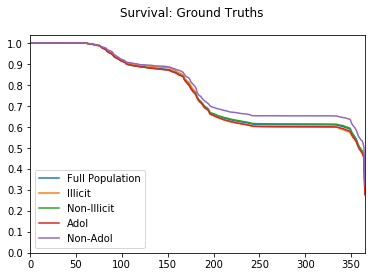

In [27]:
# display ground truth survival plot
plt.suptitle('Survival: Ground Truths')
labels_full, temp_full = get_ground_truth(df[['Illicit_Cens0','Illicit_Days0']])
plt.plot(labels_full, temp_full, label='Full Population')
illicit_df = df[df.nonillicit_flag == 0]
labels_illicit, temp_illicit = get_ground_truth(illicit_df[['Illicit_Cens0','Illicit_Days0']])
plt.plot(labels_illicit, temp_illicit, label='Illicit')
nonillicit_df = df[df.nonillicit_flag == 1]
labels_nonillicit, temp_nonillicit = get_ground_truth(nonillicit_df[['Illicit_Cens0','Illicit_Days0']])
plt.plot(labels_nonillicit, temp_nonillicit, label='Non-Illicit')
adol_df = df[df.adol == 1]
labels_adol, temp_adol = get_ground_truth(adol_df[['Illicit_Cens0','Illicit_Days0']])
plt.plot(labels_adol, temp_adol, label='Adol')
non_adol_df = df[df.adol == 0]
labels_non_adol, temp_non_adol = get_ground_truth(non_adol_df[['Illicit_Cens0','Illicit_Days0']])
plt.plot(labels_non_adol, temp_non_adol, label='Non-Adol')
plt.legend()
plt.xlim(0, 365)
plt.xticks(np.arange(0, 365, step=50))
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.savefig('graphs/GROUND_TRUTH_SURVIVAL.png')
plt.show()

In [247]:
# drop unnecessary columns
df.drop(columns=['Unnamed: 0'], inplace=True)
df.shape

(5292, 111)

Full Population Survival Analysis

In [248]:
from sklearn.model_selection import train_test_split
from sksurv.util import Surv

predictor_var = 'Illicit_Days0'
censoring_var = 'Illicit_Cens0'

y = df[[censoring_var, predictor_var]]
df.drop(columns=[censoring_var, predictor_var], inplace=True)

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
y_train_censored = Surv.from_arrays(y_train[censoring_var].copy(), y_train[predictor_var].copy()) # structured array to ensure censoring of 365 value
y_test_censored = Surv.from_arrays(y_test[censoring_var].copy(), y_test[predictor_var].copy()) # structured array to ensure censoring of 365 value
print(X_train.shape, y_train_censored.shape)
print(X_test.shape, y_test_censored.shape)

(4233, 109) (4233,)
(1059, 109) (1059,)


In [249]:
%%time
from sksurv.ensemble import GradientBoostingSurvivalAnalysis

gbsa = GradientBoostingSurvivalAnalysis()
gbsa.fit(X_train, y_train_censored)

CPU times: user 30.5 s, sys: 567 ms, total: 31 s
Wall time: 38.8 s


GradientBoostingSurvivalAnalysis(criterion='friedman_mse', dropout_rate=0.0,
                                 learning_rate=0.1, loss='coxph', max_depth=3,
                                 max_features=None, max_leaf_nodes=None,
                                 min_impurity_decrease=0.0,
                                 min_impurity_split=None, min_samples_leaf=1,
                                 min_samples_split=2,
                                 min_weight_fraction_leaf=0.0, n_estimators=100,
                                 presort='auto', random_state=None,
                                 subsample=1.0, verbose=0)

In [250]:
%%time
from sksurv.ensemble import RandomSurvivalForest

rsf = RandomSurvivalForest()
rsf.fit(X_train, y_train_censored)

CPU times: user 2.84 s, sys: 270 ms, total: 3.11 s
Wall time: 5.99 s


RandomSurvivalForest(bootstrap=True, max_depth=None, max_features='auto',
                     max_leaf_nodes=None, min_samples_leaf=3,
                     min_samples_split=6, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=None, oob_score=False,
                     random_state=None, verbose=0, warm_start=False)

In [251]:
%%time
from sksurv.linear_model import CoxnetSurvivalAnalysis

# l1_ratio = 1 adjusts model to implement LASSO method for penalties
# fit_baseline_model = True allows us to create survival/hazard plots after model is fit

rcr = CoxnetSurvivalAnalysis(fit_baseline_model=True, l1_ratio=1)
rcr.fit(X_train, y_train_censored)

CPU times: user 1.46 s, sys: 111 ms, total: 1.58 s
Wall time: 2.12 s


CoxnetSurvivalAnalysis(alpha_min_ratio=0.0001, alphas=None, copy_X=True,
                       fit_baseline_model=True, l1_ratio=1, max_iter=100000,
                       n_alphas=100, normalize=False, penalty_factor=None,
                       tol=1e-07, verbose=False)

Full Population Sruvival Curves

In [252]:
pred_surv_rsf = rsf.predict_survival_function(X_test)
pred_surv_rcr = rcr.predict_survival_function(X_test)

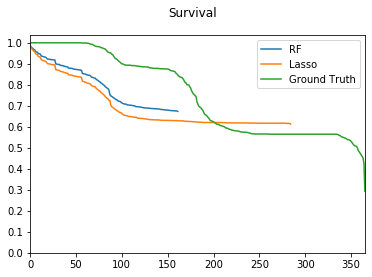

In [253]:
# display survival plot
plt.suptitle('Survival')
plt.plot(np.mean([person for person in pred_surv_rsf], axis=0), label='RF')
plt.plot(np.mean([person.y for person in pred_surv_rcr], axis=0), label='Lasso')
labels, temp = get_ground_truth(y_test)
plt.plot(labels, temp, label='Ground Truth')
plt.legend()
plt.xlim(0, 365)
plt.xticks(np.arange(0, 365, step=50))
plt.yticks(np.arange(0, 1.1, step=0.1))

if INCLUDE_NONILLICIT:
    if INCLUDE_MURDER:
        fname = 'graphs/survival_grouped_with_murder.png'
    elif INCLUDE_CENSUS:
        fname = 'graphs/survival_grouped_with_census.png'
    else:
        fname = 'graphs/survival_grouped.png'
else:
    if INCLUDE_MURDER:
        fname = 'graphs/survival_grouped_illicit_with_murder.png'
    elif INCLUDE_CENSUS:
        fname = 'graphs/survival_grouped_illicit_with_census.png'
    else:
        fname = 'graphs/survival_illicit_grouped.png'

plt.savefig(fname)
plt.show()

Full Population Statistics

In [254]:
# concordance index
scores = {'Model': ['Random Forest Boosted', 'Random Forest', 'Lasso'], 
               'Concordance': [gbsa.score(X_test, y_test_censored), rsf.score(X_test, y_test_censored), 
                        rcr.score(X_test, y_test_censored)]}
pd.DataFrame(data=scores)

,Model,Concordance
0,Random Forest Boosted,0.698464
1,Random Forest,0.696645
2,Lasso,0.697747


In [255]:
feature_importances_lasso = pd.DataFrame({'Feature':X_train.columns, 
                                          'Importance':np.average(rcr.coef_, weights=rcr.alphas_, axis = 1),})
feature_importances_lasso['Importance_abs'] = np.absolute(feature_importances_lasso['Importance'])
feature_importances_lasso = feature_importances_lasso.nlargest(10,['Importance_abs'])
display_side_by_side(feature_importances_lasso, 3)

,Feature,Importance,Importance_abs
16,srprobg_0.0,-0.408510,0.408510
18,srprobg_2.0,0.120643,0.120643
107,primsev_5.0,0.118059,0.118059
,Feature,Importance,Importance_abs
27,epsg_0_0,-0.068513,0.068513
108,primsev_6.0,0.050852,0.050852
103,r4ag_0_2.0,0.037052,0.037052
,Feature,Importance,Importance_abs
98,SESg_0_0,-0.031791,0.031791
106,primsev_4.0,0.030613,0.030613


In [256]:
feature_importances_rf = pd.DataFrame({'Feature':X_train.columns, 'Importance':gbsa.feature_importances_,})
feature_importances_rf = feature_importances_rf.nlargest(10,['Importance'])
display_side_by_side(feature_importances_rf, 3)

,Feature,Importance
16,srprobg_0.0,0.429364
107,primsev_5.0,0.098775
108,primsev_6.0,0.053921
,Feature,Importance
27,epsg_0_0,0.046666
18,srprobg_2.0,0.034074
106,primsev_4.0,0.027787
,Feature,Importance
64,pssig_0_0,0.022932
103,r4ag_0_2.0,0.022626


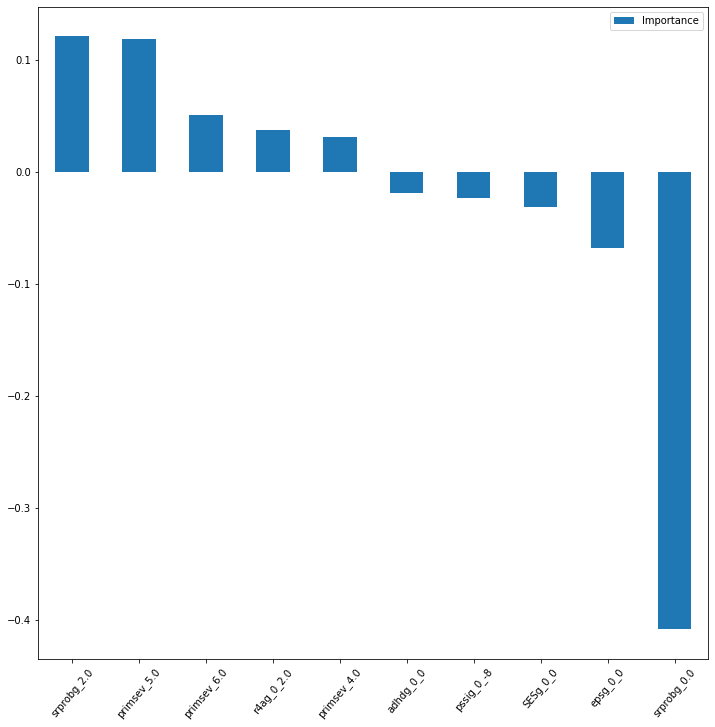

In [257]:
df = pd.DataFrame({'Importance': feature_importances_lasso['Importance'].tolist()},
                  index=feature_importances_lasso['Feature'].tolist())
df.sort_values(by=['Importance'], ascending=False, inplace=True)
ax = df.plot.bar(rot=50, figsize=(12, 12), orientation='vertical')
fig = ax.get_figure()

if INCLUDE_NONILLICIT:
    if INCLUDE_MURDER:
        fname = 'graphs/feature_importances_lasso_grouped_with_murder.png'
    elif INCLUDE_CENSUS:
        fname = 'graphs/feature_importances_lasso_grouped_with_census.png'
    else:
        fname = 'graphs/feature_importances_lasso_grouped.png'
else:
    if INCLUDE_MURDER:
        fname = 'graphs/feature_importances_lasso_illicit_grouped_with_murder.png'
    elif INCLUDE_CENSUS:
        fname = 'graphs/feature_importances_lasso_illicit_grouped_with_census.png'
    else:
        fname = 'graphs/feature_importances_lasso_illicit_grouped.png'
        
fig.savefig(fname, bbox_inches='tight')

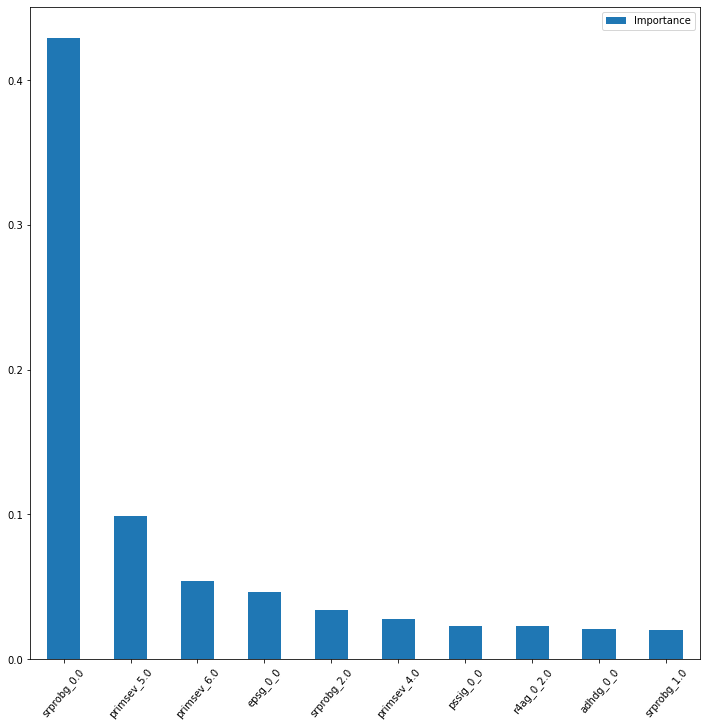

In [258]:
df = pd.DataFrame({'Importance': feature_importances_rf['Importance'].tolist()},
                  index=feature_importances_rf['Feature'].tolist())
df.sort_values(by=['Importance'], ascending=False, inplace=True)
ax = df.plot.bar(rot=50, figsize=(12, 12), orientation='vertical')
fig = ax.get_figure()

if INCLUDE_NONILLICIT:
    if INCLUDE_MURDER:
        fname = 'graphs/feature_importances_rf_grouped_with_murder.png'
    elif INCLUDE_CENSUS:
        fname = 'graphs/feature_importances_rf_grouped_with_census.png'
    else:
        fname = 'graphs/feature_importances_rf_grouped.png'
else:
    if INCLUDE_MURDER:
        fname = 'graphs/feature_importances_rf_illicit_grouped_with_murder.png'
    elif INCLUDE_CENSUS:
        fname = 'graphs/feature_importances_rf_illicit_grouped_with_census.png'
    else:
        fname = 'graphs/feature_importances_rf_illicit_grouped.png'
        
fig.savefig(fname, bbox_inches='tight')

In [259]:
# features in top 10 of both models
feature_importance_intersection = np.intersect1d(feature_importances_rf['Feature'],
                                                 feature_importances_lasso['Feature'])
print(feature_importance_intersection)

['adhdg_0_0' 'epsg_0_0' 'primsev_4.0' 'primsev_5.0' 'primsev_6.0'
 'r4ag_0_2.0' 'srprobg_0.0' 'srprobg_2.0']


In [260]:
# print out total notebook execution time
total_seconds = int(time.time() - start_time)
minutes = total_seconds // 60
seconds = total_seconds % 60
print("--- " + str(minutes) + " minutes " + str(seconds) + " seconds ---")

--- 0 minutes 52 seconds ---
